In [6]:
import pandas as pd
excel_file = 'cKWSA_Prepared.xlsx'
SA_Daily_DS = pd.read_excel(excel_file, sheet_name=0, index_col=0)
SA_Daily_DS.head()

,Max Allowable Limit,Surface Area Unit 3,Percent Gas Unit 3,Main Furnace Temperature Unit 3,Holding Vessel Temperature Unit 3,D4 Stack Temperature Unit 3
Date,,,,,,
2018-07-01,75,72.809998,68.732471,892.340027,895.065048,761.360535
2018-07-02,75,72.809998,80.256001,923.689407,924.719894,800.824692
2018-07-03,75,72.809998,87.131109,944.178207,952.986786,834.859924
2018-07-04,75,75.112497,84.438057,949.660294,968.625458,843.419342
2018-07-05,75,75.062500,83.905128,950.264893,972.312286,843.664337


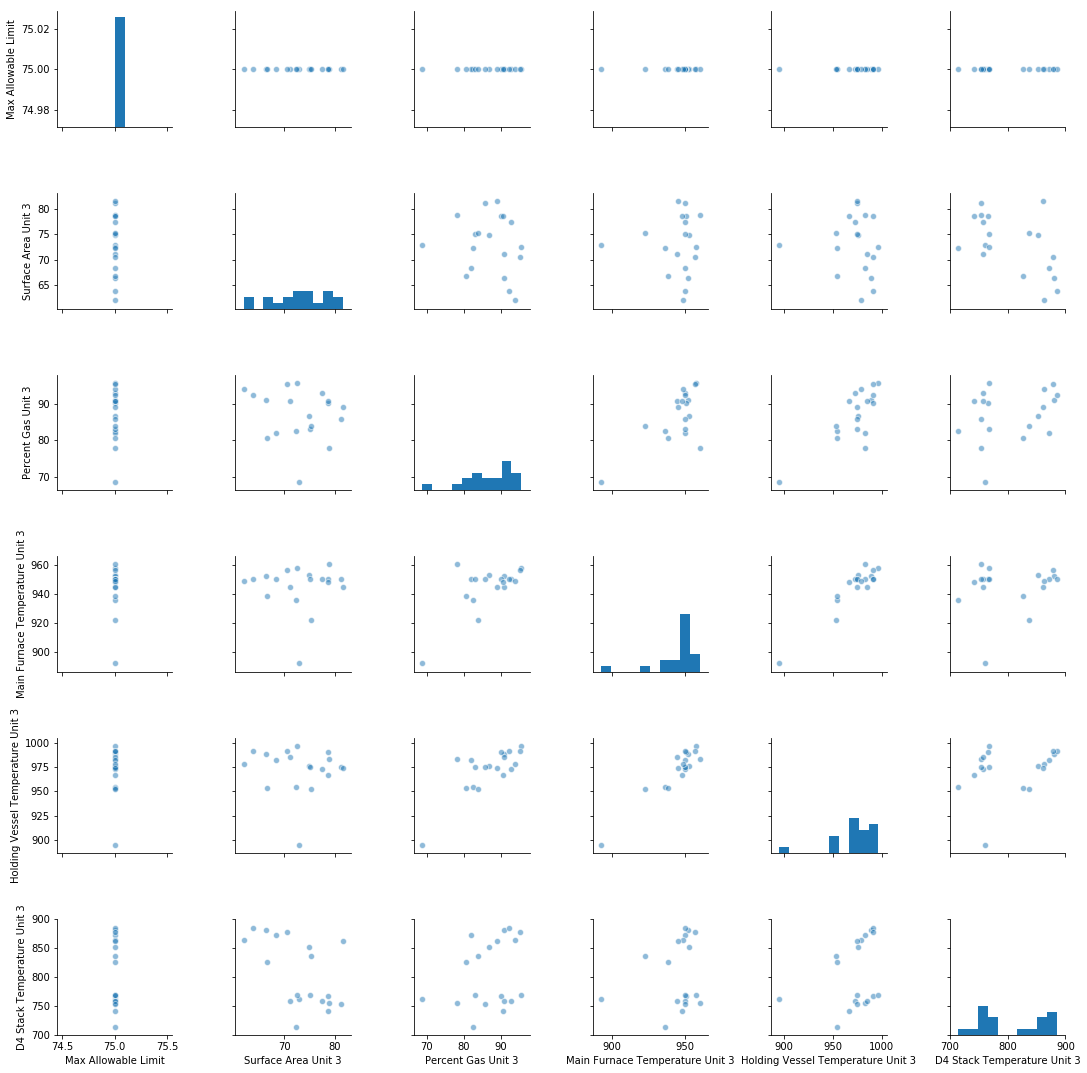

In [8]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt

seaborn.pairplot(SA_Daily_DS.iloc[::5], plot_kws={'alpha': 0.5})

In [11]:
excel_file = 'cKWSA_Prepared.xlsx'
SA_Daily_DS2 = pd.read_excel(excel_file, sheet_name=1, index_col=0)
SA_Daily_DS2.head()

,Average SA,Furnace Temp,HV Temp,D4 Temp
Date,,,,
2018-07-01,72.809998,923.689407,924.719894,800.824692
2018-07-02,72.809998,944.178207,952.986786,834.859924
2018-07-03,75.112497,949.660294,968.625458,843.419342
2018-07-04,75.062500,950.264893,972.312286,843.664337
2018-07-05,74.790001,952.702560,975.760452,852.348572


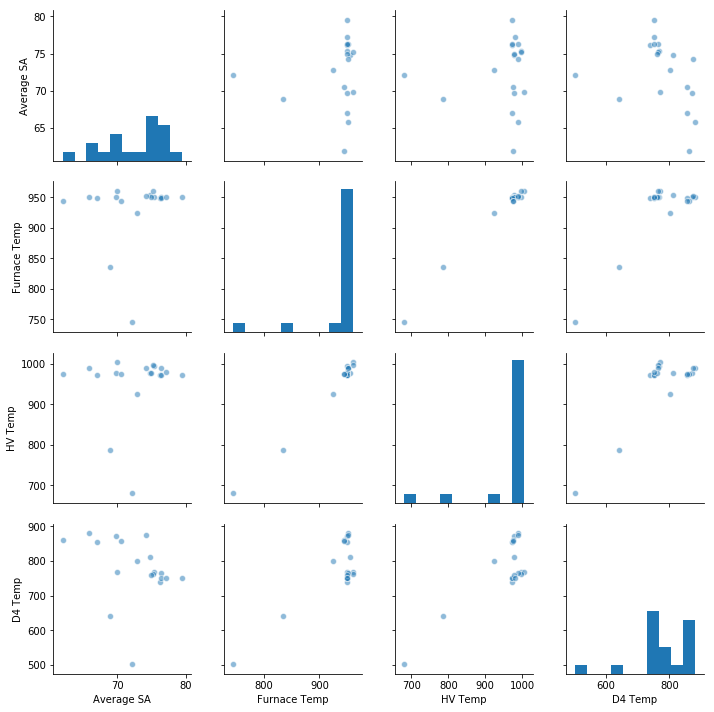

In [12]:
seaborn.pairplot(SA_Daily_DS2.iloc[::5], plot_kws={'alpha': 0.5})

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = SA_Daily_DS2[['Furnace Temp']]
Y = SA_Daily_DS2['Average SA']
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

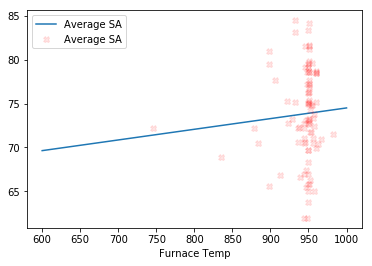

In [28]:
# compare average SA to Furnace Temp
import numpy as np
xfit = np.linspace(600, 1000)
xfit_reshaped = xfit[:, np.newaxis]
yfit = model.predict(xfit_reshaped)

Predicted_df = pd.DataFrame({'Furnace Temp':xfit, 'Average SA':yfit})
ax = Predicted_df.plot('Furnace Temp','Average SA')
SA_Daily_DS2.plot('Furnace Temp','Average SA',marker='X', linewidth = 0, ax=ax, c = 'red', alpha=0.1)

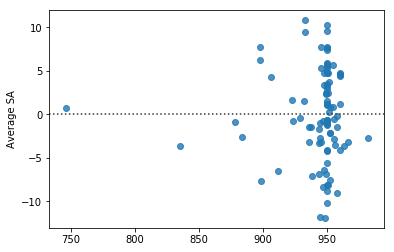

In [29]:
seaborn.residplot(X,Y)

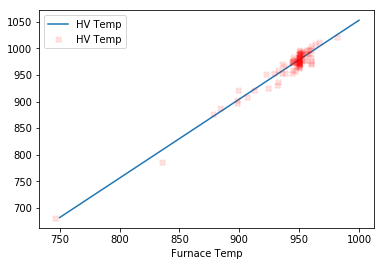

In [25]:
# compare HV Temp to Furnace Temp

model2 = LinearRegression(fit_intercept=True)
X2 = SA_Daily_DS2[['Furnace Temp']]
Y2 = SA_Daily_DS2['HV Temp']
model2.fit(X2,Y2)

xfit2 = np.linspace(750, 1000)
xfit2_reshaped = xfit2[:, np.newaxis]
yfit2 = model2.predict(xfit2_reshaped)

Predicted_df = pd.DataFrame({'Furnace Temp':xfit2, 'HV Temp':yfit2})
ax = Predicted_df.plot('Furnace Temp','HV Temp')
SA_Daily_DS2.plot('Furnace Temp','HV Temp',marker='X', linewidth = 0, ax=ax, c = 'red', alpha=0.1)

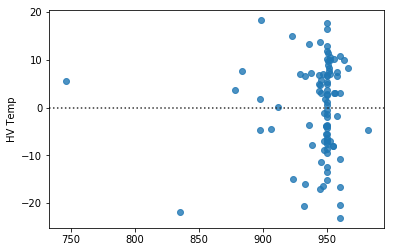

In [21]:
seaborn.residplot(X2,Y2)